In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
import mplcursors
import seaborn as sns
import math
from datetime import datetime, timedelta
warnings.filterwarnings('ignore')

In [2]:
covid_demographics_dataset_original = pd.read_csv('dataset/covid19casesdemographics_012022.csv')
covid_demographics_dataset = covid_demographics_dataset_original.copy()
covid_demographics_dataset.head()

,demographic_category,demographic_value,total_cases,percent_cases,deaths,percent_deaths,percent_of_ca_population,report_date
0,Age Group,0-17,855,2.3,0,0.0,22.5,2020-04-22
1,Age Group,0-17,936,2.4,0,0.0,22.5,2020-04-23
2,Age Group,0-17,1011,2.5,0,0.0,22.5,2020-04-24
3,Age Group,0-17,1039,2.5,0,0.0,22.5,2020-04-25
4,Age Group,0-17,1085,2.5,0,0.0,22.5,2020-04-26


In [3]:
covid_demographics_dataset['demographic_category'].unique()

array(['Age Group', 'Gender', 'Race Ethnicity'], dtype=object)

## Covid19 Demographics: Age

In [4]:
covid_age_dataset = covid_demographics_dataset[covid_demographics_dataset['demographic_category']=='Age Group']
covid_age_dataset_v1 = covid_age_dataset.drop('demographic_category', axis=1)

In [5]:
covid_age_dataset_v1.head()

,demographic_value,total_cases,percent_cases,deaths,percent_deaths,percent_of_ca_population,report_date
0,0-17,855,2.3,0,0.0,22.5,2020-04-22
1,0-17,936,2.4,0,0.0,22.5,2020-04-23
2,0-17,1011,2.5,0,0.0,22.5,2020-04-24
3,0-17,1039,2.5,0,0.0,22.5,2020-04-25
4,0-17,1085,2.5,0,0.0,22.5,2020-04-26


In [6]:
Missing_v1 = covid_age_dataset_v1[covid_age_dataset_v1['demographic_value']=='Missing'].index
Missing_v2 = covid_age_dataset_v1[covid_age_dataset_v1['demographic_value']=='missing'].index
Total = covid_age_dataset_v1[covid_age_dataset_v1['demographic_value']=='Total'].index

In [7]:
covid_age_dataset_v1.drop(Missing_v1,  inplace=True)
covid_age_dataset_v1.drop(Missing_v2,  inplace=True)
covid_age_dataset_v1.drop(Total,  inplace=True)

In [8]:
covid_age_dataset_v1['report_date'] = pd.to_datetime(covid_age_dataset_v1['report_date'], format = '%Y-%m-%d')

In [9]:
selected_visualized_dataset_v1 = ['total_cases', 'percent_cases', 'percent_deaths']

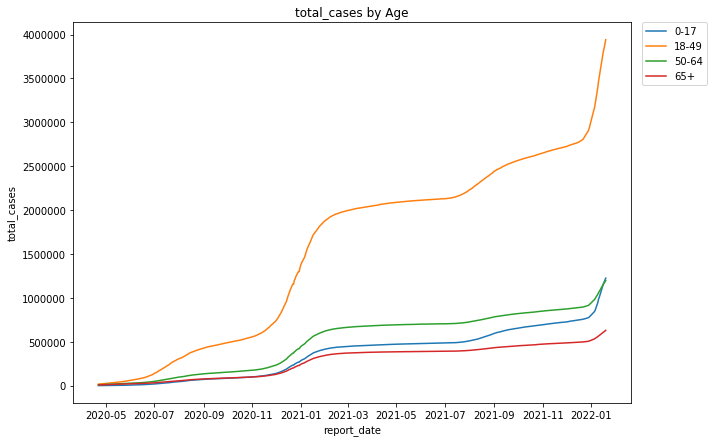

<Figure size 720x432 with 0 Axes>

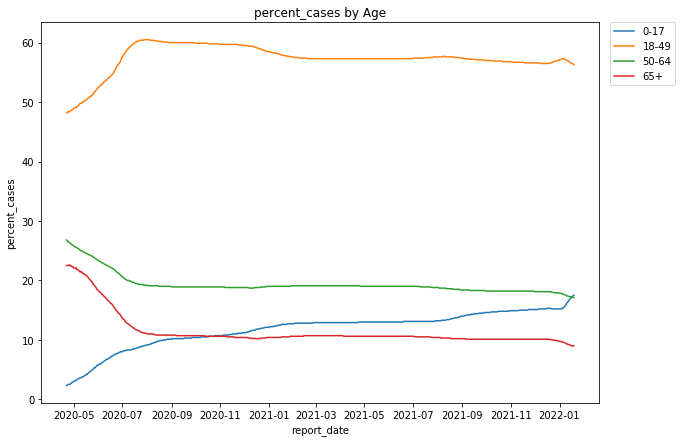

<Figure size 720x432 with 0 Axes>

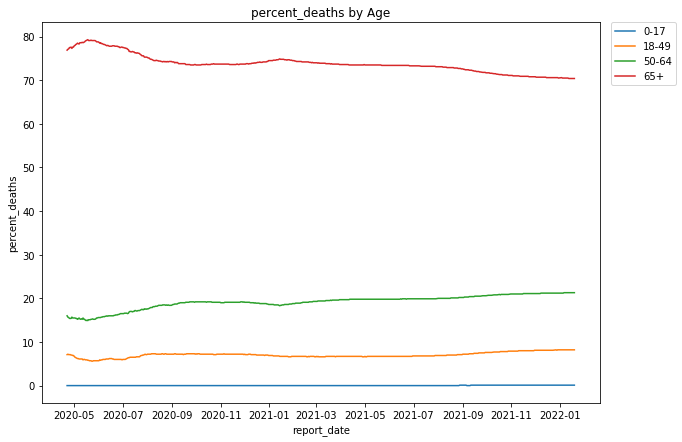

<Figure size 720x432 with 0 Axes>

In [10]:
for i in range(0, len(selected_visualized_dataset_v1)):
    fig = plt.figure(figsize=(10,7))
    sns.lineplot(data=covid_age_dataset_v1, 
                 x="report_date", 
                 y=selected_visualized_dataset_v1[i], 
                 hue="demographic_value").set_title(str(selected_visualized_dataset_v1[i])+" by Age")
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.figure(figsize=(10,6))

## Covid19 Demographics: Gender

In [11]:
covid_gender_dataset = covid_demographics_dataset[covid_demographics_dataset['demographic_category']=='Gender']
covid_gender_dataset_v1 =covid_gender_dataset.drop('demographic_category', axis=1)
covid_gender_dataset_v1.head()

,demographic_value,total_cases,percent_cases,deaths,percent_deaths,percent_of_ca_population,report_date
3528,Female,18395,49.2,552,39.5,50.3,2020-04-22
3529,Female,19394,49.4,593,39.8,50.3,2020-04-23
3530,Female,20395,49.6,625,39.7,50.3,2020-04-24
3531,Female,20908,49.6,657,39.9,50.3,2020-04-25
3532,Female,21562,49.6,664,39.6,50.3,2020-04-26


In [12]:
covid_gender_dataset_v1['demographic_value'].unique()

array(['Female', 'Male', 'Total', 'Unknown'], dtype=object)

In [13]:
Unknwon = covid_gender_dataset_v1[covid_gender_dataset_v1['demographic_value']=='Unknown'].index
Total = covid_gender_dataset_v1[covid_gender_dataset_v1['demographic_value']=='Total'].index

In [14]:
covid_gender_dataset_v1.drop(Unknwon,  inplace=True)
covid_gender_dataset_v1.drop(Total,  inplace=True)

In [15]:
covid_gender_dataset_v1['report_date'] = pd.to_datetime(covid_gender_dataset_v1['report_date'], format = '%Y-%m-%d')

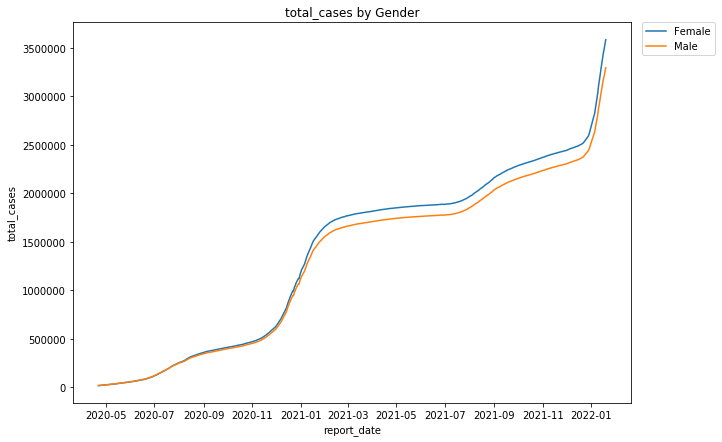

<Figure size 720x432 with 0 Axes>

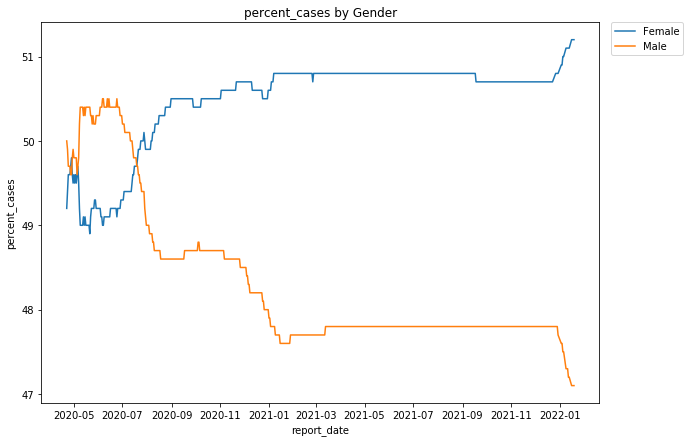

<Figure size 720x432 with 0 Axes>

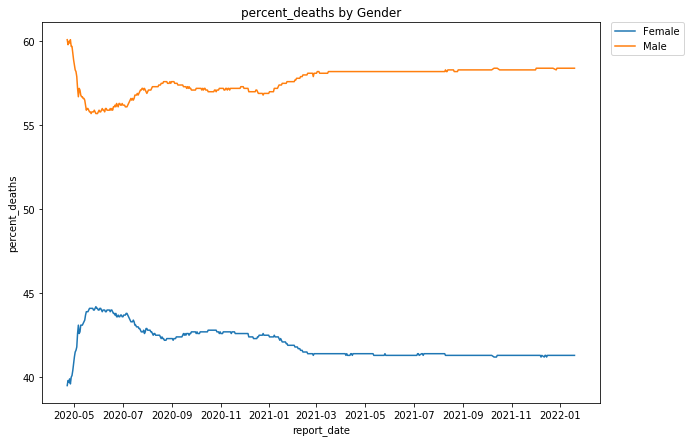

<Figure size 720x432 with 0 Axes>

In [16]:
for i in range(0, len(selected_visualized_dataset_v1)):
    fig = plt.figure(figsize=(10,7))
    sns.lineplot(data=covid_gender_dataset_v1, 
                 x="report_date", 
                 y=selected_visualized_dataset_v1[i], 
                 hue="demographic_value").set_title(str(selected_visualized_dataset_v1[i])+" by Gender")
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.figure(figsize=(10,6))

In [17]:
covid_race_dataset = covid_demographics_dataset[covid_demographics_dataset['demographic_category']=='Race Ethnicity']
covid_race_dataset_v1 =covid_race_dataset.drop('demographic_category', axis=1)
covid_race_dataset_v1.head()

,demographic_value,total_cases,percent_cases,deaths,percent_deaths,percent_of_ca_population,report_date
5880,American Indian or Alaska Native,33,0.2,3,0.5,0.5,2020-04-13
5881,American Indian or Alaska Native,33,0.2,3,0.4,0.5,2020-04-14
5882,American Indian or Alaska Native,32,0.2,3,0.4,0.5,2020-04-15
5883,American Indian or Alaska Native,34,0.2,4,0.5,0.5,2020-04-16
5884,American Indian or Alaska Native,38,0.2,4,0.4,0.5,2020-04-17


In [18]:
covid_race_dataset_v1['demographic_value'].unique()

array(['American Indian or Alaska Native', 'Asian', 'Black', 'Latino',
       'Multi-Race', 'Native Hawaiian and other Pacific Islander',
       'Other', 'Total', 'White'], dtype=object)

In [19]:
Total = covid_race_dataset_v1[covid_race_dataset_v1['demographic_value']=='Total'].index
covid_race_dataset_v1.drop(Total,  inplace=True)

In [20]:
covid_race_dataset_v1['report_date'] = pd.to_datetime(covid_race_dataset_v1['report_date'], format = '%Y-%m-%d')

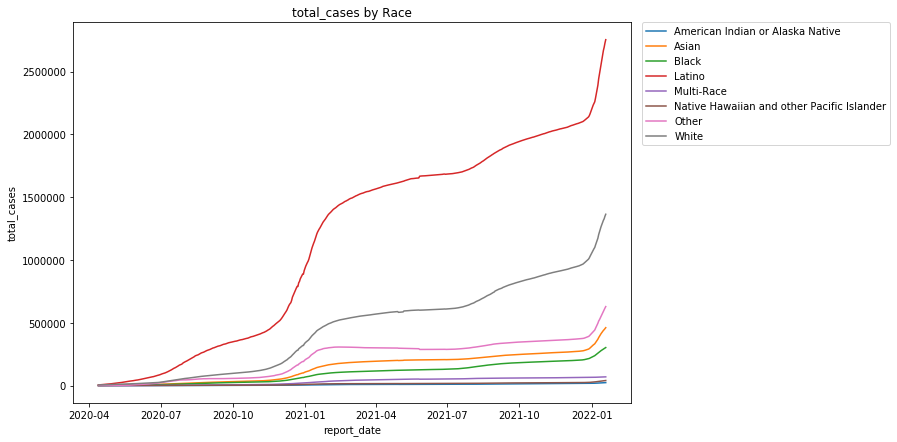

<Figure size 720x432 with 0 Axes>

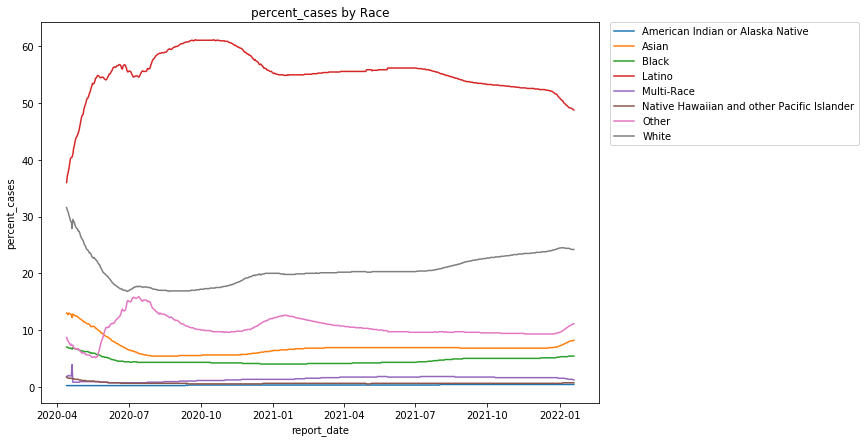

<Figure size 720x432 with 0 Axes>

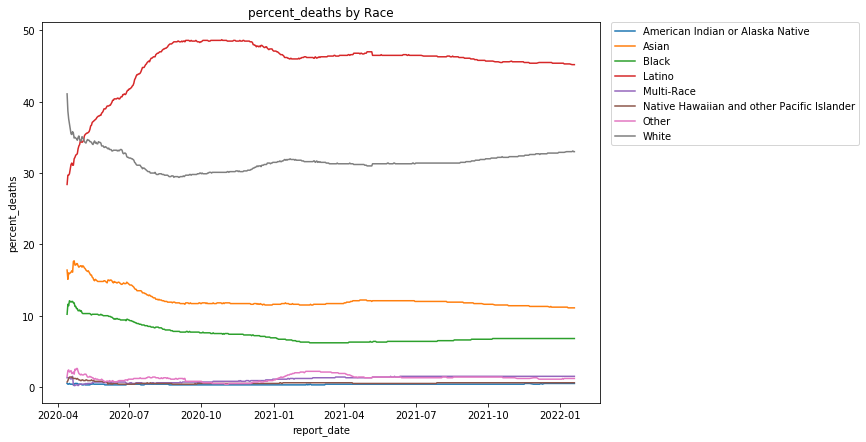

<Figure size 720x432 with 0 Axes>

In [21]:
for i in range(0, len(selected_visualized_dataset_v1)):
    fig = plt.figure(figsize=(10,7))
    sns.lineplot(data=covid_race_dataset_v1, 
                 x="report_date", 
                 y=selected_visualized_dataset_v1[i], 
                 hue="demographic_value").set_title(str(selected_visualized_dataset_v1[i])+" by Race")
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.figure(figsize=(10,6))